In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.auth import default
import pandas as pd

# Authenticate and create a client
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# llm_1 = pd.DataFrame(gc.open("LLM Annotations").get_worksheet(0).get_all_records())
human_1a = pd.DataFrame(gc.open("Javanese - Annotations").get_worksheet(0).get_all_records())

llm_1 = pd.DataFrame(gc.open("Kappa Computation").get_worksheet(-2).get_all_records())

# human_1a = pd.read_excel('/content/drive/MyDrive/Honorifics/LLM Annotations.gsheet', sheet_name="Hindi")
# human_1b = pd.read_excel('/content/drive/MyDrive/Honorifics/Honorific Annotations/Hindi Annotations.gsheet')

In [ ]:
human_1a_refined = pd.DataFrame([])
llm_1a_refined = pd.DataFrame([])

for i, row in human_1a.iterrows():
    if row['Pronoun/Verb in Article Text'] == '' or (i < len(llm_1) and llm_1.iloc[i]['Pronoun/Verb in Article Text'] == 'Not Applicable') or i >= len(llm_1):
        continue
    human_1a_refined = pd.concat([human_1a_refined, pd.DataFrame([row])])
    llm_1a_refined = pd.concat([llm_1a_refined, pd.DataFrame([llm_1.iloc[i]])])

print(len(human_1a_refined))
print(len(llm_1a_refined))

human_1a = human_1a_refined
llm_1 = llm_1a_refined

100
100


In [ ]:

print(len(llm_1))
print(len(human_1a))

100
100


In [ ]:
# !pip install gspread google-auth-oauthlib google-auth-httplib2

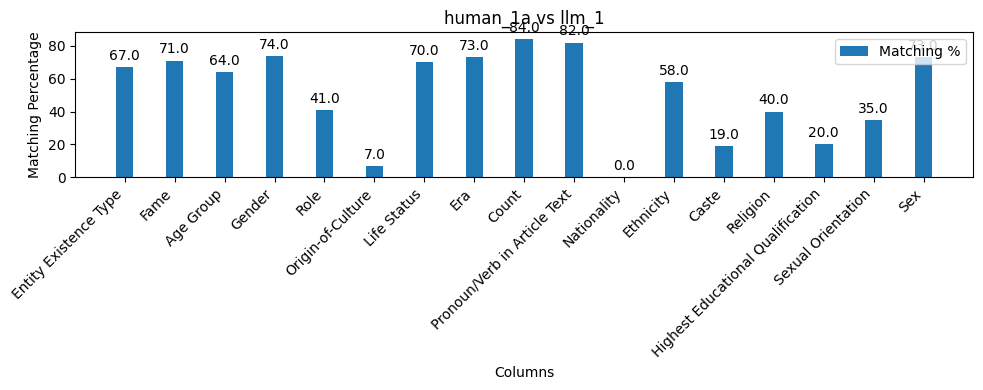

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

columns_to_compare = [
    'Entity Existence Type', 'Fame', 'Age Group', 'Gender', 'Role', 'Origin-of-Culture', 'Life Status', 'Era', 'Count',
    'Pronoun/Verb in Article Text', 'Nationality', 'Ethnicity', 'Caste', 'Religion', 'Highest Educational Qualification', 'Sexual Orientation',
    'Sex'
]

# columns_to_compare = [
#     'Fame', 'Age Group', 'Gender', 'Role', 'Life Status', 'Era', 'Count',
#     'Pronoun/Verb in Article Text'
# ]

def calculate_column_wise_matching_percentage(df1, df2, columns):
    total_rows = len(df1)
    common_indices = df1.index.intersection(df2.index)
    matching_percentage = {}

    for column in columns:
        # print(column)
        df1_filtered = df1.loc[common_indices, column]
        df2_filtered = df2.loc[common_indices, column]

        # Calculate matching count
        matching_count = (df1_filtered == df2_filtered).sum()
        # matching_count = (df1[column] == df2[column]).sum()
        matching_percentage[column] = (matching_count / total_rows) * 100

    return pd.DataFrame(matching_percentage, index=['matching_percentage'])

def plot_matching_results(result_dfs, titles):
    fig, axs = plt.subplots(len(result_dfs), 1, figsize=(10, len(result_dfs) * 4))

    if len(result_dfs) == 1:
        axs = [axs]

    for i, (result_df, title) in enumerate(zip(result_dfs, titles)):
        labels = result_df.columns
        matching = result_df.loc['matching_percentage'].values

        x = np.arange(len(labels))
        width = 0.35

        rects1 = axs[i].bar(x, matching, width, label='Matching %')

        axs[i].set_xlabel('Columns')
        axs[i].set_ylabel('Matching Percentage')
        axs[i].set_title(title)
        axs[i].set_xticks(x)
        axs[i].set_xticklabels(labels, rotation=45, ha='right')
        axs[i].legend()

        for rect in rects1:
            height = rect.get_height()
            axs[i].annotate('{}'.format(round(height, 1)),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),
                            textcoords="offset points",
                            ha='center', va='bottom')

    fig.tight_layout()
    plt.show()

# result_1a_vs_1b = calculate_column_wise_matching_percentage(human_1a, human_1b, columns_to_compare)
result_1a_vs_llm1 = calculate_column_wise_matching_percentage(human_1a, llm_1, columns_to_compare)
# result_1b_vs_llm1 = calculate_column_wise_matching_percentage(human_1b, llm_1, columns_to_compare)

plot_matching_results(
    [result_1a_vs_llm1],
    ['human_1a vs llm_1']
)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_all_agree_percentage(human_1a, human_1b, llm, columns):
    total_rows = len(human_1a)

    all_agree_percentage = {}

    for column in columns:
        all_agree = ((human_1a[column] == human_1b[column]) & (human_1a[column] == llm[column])).sum()
        all_agree_percentage[column] = (all_agree / total_rows) * 100

    return all_agree_percentage

def plot_all_agree_results(agree_percentage, title):
    categories = list(agree_percentage.keys())
    values = list(agree_percentage.values())

    fig, ax = plt.subplots(figsize=(10, 6))

    x = np.arange(len(categories))
    ax.bar(x, values, width=0.6, label='All Agree %')

    ax.set_xlabel('Columns')
    ax.set_ylabel('Percentage')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right')

    for i, v in enumerate(values):
        ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

all_agree_1 = calculate_all_agree_percentage(human_1a, human_1b, llm_1, columns_to_compare)
plot_all_agree_results(all_agree_1, 'All Agree Percentage for human_1a, human_1b, and llm_1')

# all_agree_2 = calculate_all_agree_percentage(human_2a, human_2b, llm_2, columns_to_compare)
# plot_all_agree_results(all_agree_2, 'All Agree Percentage for human_2a, human_2b, and llm_2')

# all_agree_3 = calculate_all_agree_percentage(human_3a, human_3b, llm_3, columns_to_compare)
# plot_all_agree_results(all_agree_3, 'All Agree Percentage for human_3a, human_3b, and llm_3')

NameError: name 'human_1b' is not defined

In [ ]:
set(human_1a["title"]) - set(llm_1["title"]).intersection(set(human_1a["title"]))

set()

In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

def preprocess_dataframe(df):
    df = df.astype(str)
    df = df.replace(['nan', 'NaN', 'None', ''], 'n/a')
    return df

def calculate_kappa_for_columns(df1, df2, columns, key_column='Entity'):
    if key_column not in df1.columns or key_column not in df2.columns:
        raise ValueError(f"The key column '{key_column}' must exist in both dataframes.")

    df_merged = pd.merge(df1, df2, on=key_column, how='inner', suffixes=('_df1', '_df2'))

    kappa_scores = {}
    for column in columns:
        if column == key_column:
            continue

        column_df1 = f"{column}_df1"
        column_df2 = f"{column}_df2"

        if column_df1 in df_merged.columns and column_df2 in df_merged.columns:
            df_pair = df_merged[[column_df1, column_df2]]

            print(df_pair)

            if len(df_pair[column_df1].unique()) > 1 and len(df_pair[column_df2].unique()) > 1:
                try:
                    kappa = cohen_kappa_score(df_pair[column_df1], df_pair[column_df2])
                except Exception as e:
                    kappa = f'Error: {e}'
            else:
                kappa = 'Cannot calculate (single class)'
        else:
            kappa = 'Column not found in both dataframes'

        kappa_scores[column] = kappa

    results_df = pd.DataFrame.from_dict(kappa_scores, orient='index', columns=["Cohen's Kappa"])

    results_df['Interpretation'] = results_df["Cohen's Kappa"].apply(interpret_kappa)

    return results_df

def interpret_kappa(kappa):
    if isinstance(kappa, str):
        return kappa
    kappa = round(kappa, 2)
    if kappa == 1.0:
        return 'Perfect agreement'
    elif kappa < 0.0:
        return 'Poor agreement'
    elif 0.0 <= kappa <= 0.20:
        return 'Slight agreement'
    elif 0.21 <= kappa <= 0.40:
        return 'Fair agreement'
    elif 0.41 <= kappa <= 0.60:
        return 'Moderate agreement'
    elif 0.61 <= kappa <= 0.80:
        return 'Substantial agreement'
    elif 0.81 <= kappa <= 1.0:
        return 'Almost perfect agreement'
    else:
        print("Kappa in else : ", kappa)
        return 'Invalid kappa value'

# columns_to_compare = [
#     'Entity Existence Type', 'Fame', 'Age Group', 'Gender', 'Role', 'Origin-of-Culture', 'Life Status', 'Era', 'Count',
#     'Pronoun/Verb in Article Text'
# ]

human_1a = preprocess_dataframe(human_1a)
# human_1b = preprocess_dataframe(human_1b)
llm_1 = preprocess_dataframe(llm_1)

# kappa_human_1a_vs_1b = calculate_kappa_for_columns(human_1a, human_1b, columns_to_compare, key_column='Entity')
kappa_human_1a_vs_llm_1 = calculate_kappa_for_columns(human_1a, llm_1, columns_to_compare, key_column='title')
# kappa_human_1b_vs_llm_1 = calculate_kappa_for_columns(human_1b, llm_1, columns_to_compare, key_column='Entity')

# print("Cohen's Kappa Scores for human_1a vs human_1b:")
# print(kappa_human_1a_vs_1b)

print("\nCohen's Kappa Scores for human_1a vs llm_1:")
print(kappa_human_1a_vs_llm_1)

# print("\nCohen's Kappa Scores for human_1b vs llm_1:")
# print(kappa_human_1b_vs_llm_1)

         Entity Existence Type_df1 Entity Existence Type_df2
0                     Human & Real              Human & Real
1                     Human & Real              Human & Real
2                     Human & Real              Human & Real
3   Human & Mythological character                       God
4   Human & Mythological character                       God
..                             ...                       ...
95                    Human & Real              Human & Real
96                    Human & Real              Human & Real
97                    Human & Real              Human & Real
98                    Human & Real              Human & Real
99                   Animal & Real             Animal & Real

[100 rows x 2 columns]
    Fame_df1 Fame_df2
0     Famous   Famous
1     Famous   Famous
2     Famous   Famous
3   Infamous   Famous
4     Famous   Famous
..       ...      ...
95    Famous   Famous
96    Famous   Famous
97    Famous   Famous
98    Famous   Famous
99

In [ ]:

from sklearn.metrics import classification_report

merged_df = pd.merge(human_1a, llm_1, on='title', how='inner')

print(classification_report(merged_df["Pronoun/Verb in Article Text_x"], merged_df["Pronoun/Verb in Article Text_y"]))

               precision    recall  f1-score   support

    Honorific       0.99      0.97      0.98        94
Non-Honorific       0.62      0.83      0.71         6

     accuracy                           0.96       100
    macro avg       0.81      0.90      0.85       100
 weighted avg       0.97      0.96      0.96       100



In [ ]:
print(classification_report(merged_df["Origin-of-Culture_x"], merged_df["Origin-of-Culture_y"]))

              precision    recall  f1-score   support

      Exotic       0.98      0.93      0.96        70
      Native       0.85      0.97      0.91        30

    accuracy                           0.94       100
   macro avg       0.92      0.95      0.93       100
weighted avg       0.95      0.94      0.94       100



In [ ]:
print(classification_report(merged_df["Role_x"], merged_df["Role_y"]))

                           precision    recall  f1-score   support

  Activists and Reformers       1.00      1.00      1.00         1
         Arts and Culture       0.00      0.00      0.00         0
     Business and Economy       0.20      1.00      0.33         1
                    Deity       0.75      0.50      0.60         6
   Education and Academia       0.00      0.00      0.00         0
            Entertainment       0.38      0.92      0.54        12
Literature and Philosophy       0.25      0.67      0.36         3
           Not Applicable       0.00      0.00      0.00         0
  Politics and Governance       0.21      1.00      0.34         5
Religion and Spirituality       0.17      1.00      0.29         1
     Royalty and Nobility       0.60      0.75      0.67         4
   Science and Technology       0.00      0.00      0.00         0
                   Sports       0.50      1.00      0.67         2
                      n/a       0.00      0.00      0.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:

import pandas as pd
pd.read_csv(io.StringIO('''
Bengali (new version),0.43,0.44,0.49,0.46,0.94,94%,100,Honorific/Non-Honorific/Not-Applicable
'''), header=None)


NameError: name 'io' is not defined